## Assignment 1: Linear Regression and FDR
#### Language: Python
#### Dataset: fundamentals.csv
#### Author: Yuxin Yi
#### Team 6: Tien (Candice) Her, Manickashree Thayumana Sundaram, Yuxin Yi

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from itertools import combinations
import numpy as np

# Load the dataset
fundamentals = pd.read_csv('/Users/guanliyuan/Desktop/BAX 452 ML/BAX 452_HW#1/fundamentals.csv')

# Data cleaning
fundamentals = fundamentals.dropna() # Drop rows with NA values
fundamentals['For Year'] = fundamentals['For Year'].astype(int) # Modify the year to integer

# View the data
fundamentals.head(10)

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-2.220000e+08,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-9.300000e+07,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-1.600000e+08,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,3.520000e+08,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-8.948200e+07,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012,5.29,7.328355e+07
5,5,AAP,2013-12-28,2.609239e+09,-3.242800e+07,2.698000e+06,26.0,-1.957570e+08,5.312930e+08,40.0,...,3.989384e+09,2.764785e+09,1.516205e+09,4.048569e+09,5.564774e+09,6.493814e+09,-107890000.0,2013,5.36,7.308918e+07
6,6,AAP,2015-01-03,3.616038e+09,-4.820900e+07,3.092000e+06,25.0,-2.284460e+08,5.629450e+08,3.0,...,4.741040e+09,3.654416e+09,2.002912e+09,5.959446e+09,7.962358e+09,9.843861e+09,-113044000.0,2014,6.75,7.315926e+07
7,7,AAP,2016-01-02,3.757085e+09,-2.147600e+07,-7.484000e+06,19.0,-2.347470e+08,6.033320e+08,2.0,...,4.940746e+09,3.797477e+09,2.460648e+09,5.673917e+09,8.134565e+09,9.737018e+09,-119709000.0,2015,6.45,7.339504e+07
8,8,AAPL,2013-09-28,3.622300e+10,-1.949000e+09,1.156000e+09,30.0,-8.165000e+09,0.000000e+00,93.0,...,7.328600e+10,4.365800e+10,1.235490e+11,8.345100e+10,2.070000e+11,1.709100e+11,0.0,2013,40.03,9.252311e+08
9,9,AAPL,2014-09-27,4.864900e+10,-6.452000e+09,9.800000e+08,35.0,-9.571000e+09,0.000000e+00,40.0,...,6.853100e+10,6.344800e+10,1.115470e+11,1.202920e+11,2.318390e+11,1.827950e+11,0.0,2014,6.49,6.087827e+09


#### Question 1. Data Exploration and Visualization: Explore the “fundamentals.csv”. Include any other plots you find interesting.


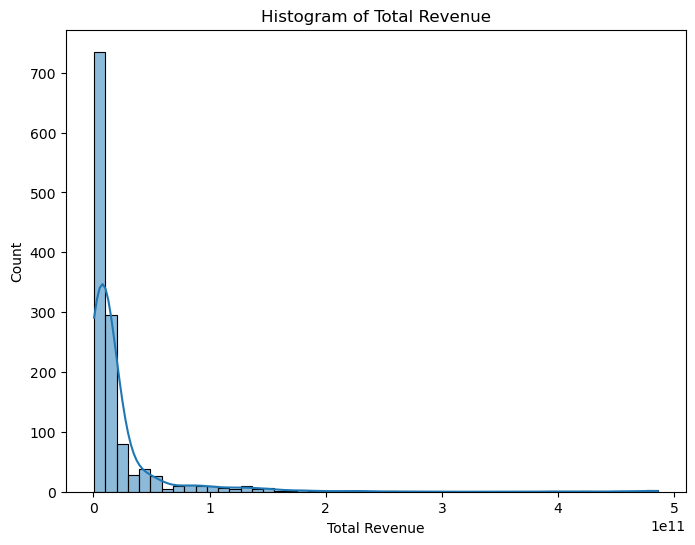

In [2]:
# Plot 1: Histogram of 'Total Revenue'
plt.figure(figsize=(8, 6))
sns.histplot(fundamentals['Total Revenue'], bins=50, kde=True)
plt.title('Histogram of Total Revenue')
plt.show()


Insight: The histogram for 'Total Revenue' shows a highly right-skewed distribution, indicating that the majority of companies in the dataset have relatively low revenue figures, while a small fraction of companies have significantly higher revenues. This pattern is common in many financial datasets, where wealth and resources tend to be concentrated among a small proportion of the population.

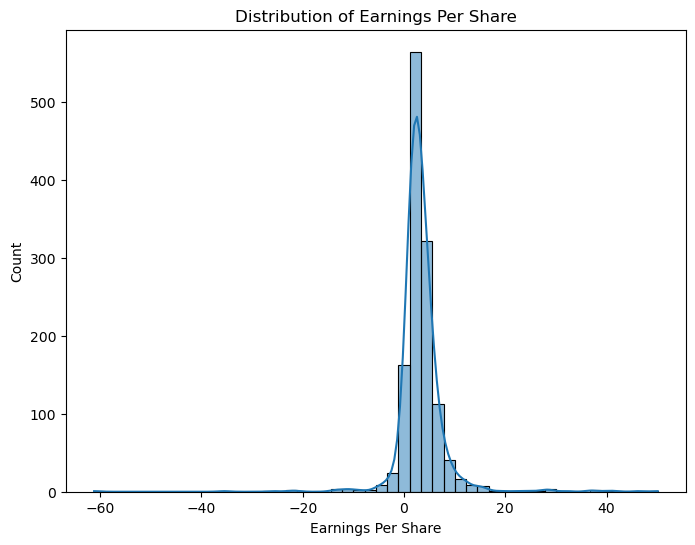

In [3]:
# Plot 2: Histogram of 'Distribution of Earnings Per Share'
plt.figure(figsize=(8, 6))
sns.histplot(fundamentals['Earnings Per Share'], bins=50, kde=True)
plt.title('Distribution of Earnings Per Share')
plt.show()


Insight: The histogram displaying the distribution of Earnings Per Share reveals a positive skew, with the majority of companies recording a modest EPS slightly above zero. A pronounced peak near the center suggests a high frequency of firms clustered around a common EPS value, while a noticeable tail to the right hints at the presence of exceptional outliers, indicating a small number of companies with significantly higher profitability. Additionally, the negative EPS region implies that the group of companies experiencing losses is much smaller in comparison to those with positive earnings.


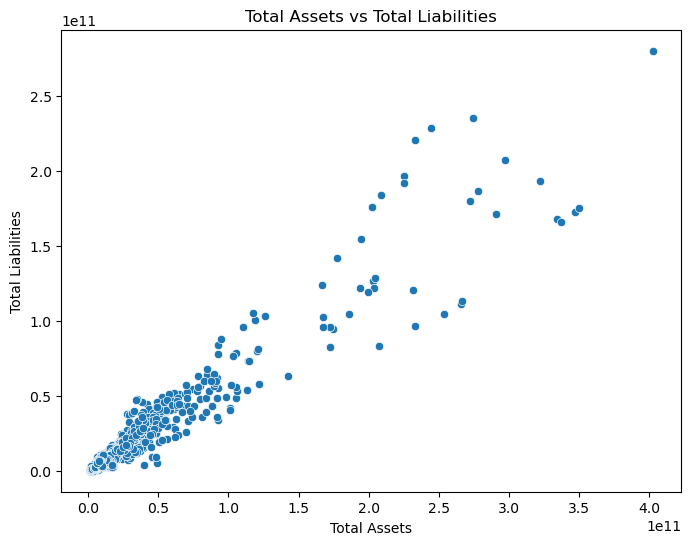

In [4]:
# Plot 3: Scatter plot of 'Total Assets vs Total Liabilities'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=fundamentals['Total Assets'], y=fundamentals['Total Liabilities'])
plt.title('Total Assets vs Total Liabilities')
plt.show()


The scatter plot presents how companies' assets and liabilities are aligned, with a notable positive trend indicating that as companies amass more assets, their liabilities generally rise in tandem. The dense grouping of data points toward the origin suggests a majority of the firms surveyed are smaller in scale, with modest asset bases and corresponding liabilities. As we move to the right, for the companies with greater assets, their liabilities also tend to increase, suggesting that larger companies often leverage more debt, which could be a sign of healthy business expansion or aggressive growth strategies.

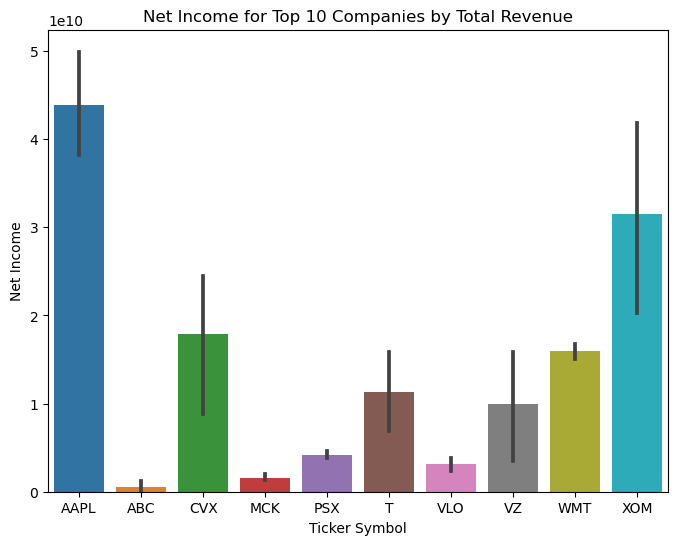

In [5]:
# Plot 4: Bar plot of 'Net Income for the top 10 companies by Total Revenue'
top_companies = fundamentals.groupby('Ticker Symbol')['Total Revenue'].sum().sort_values(ascending=False).head(10).index
top_companies_data = fundamentals[fundamentals['Ticker Symbol'].isin(top_companies)]
plt.figure(figsize=(8, 6))
sns.barplot(x='Ticker Symbol', y='Net Income', data=top_companies_data)
plt.title('Net Income for Top 10 Companies by Total Revenue')
plt.show()


The bar plot depicts the net income for the top 10 companies ranked by total revenue, showing a snapshot of profitability among the highest revenue-generating firms， and the height of each bar represents the net income. And I recognized that some companies may have high revenue, but their net incomes are low.

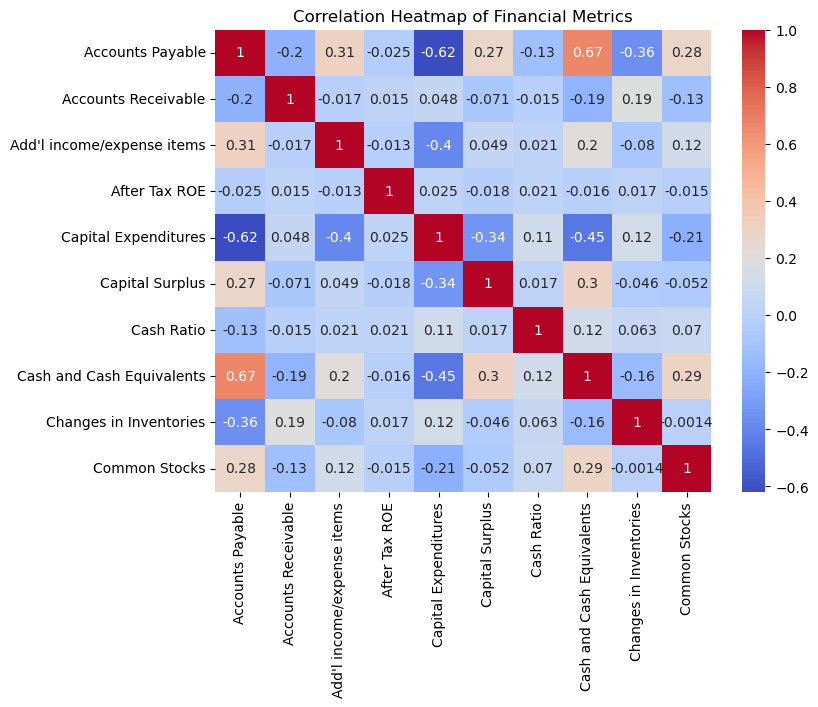

In [6]:
# Plot 5: Heatmap of the correlation of financial metrics
plt.figure(figsize=(8, 6))
sns.heatmap(fundamentals.iloc[:, 3:13].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Financial Metrics')
plt.show()

Through the heatmap, I found that there is a significant negative correlation with Cash and Cash Equivalents, potentially indicating that as inventory levels increase, available cash decreases, which could be due to funds being tied up in inventory.


#### Question 2. Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding. Explain your model.

In [7]:
# Drop the first 3 columns
df = fundamentals.drop(columns=['Unnamed: 0', 'Period Ending', 'Ticker Symbol'])
x = df.iloc[:,:75]
y = df.iloc[:, -1]
model1 = smf.ols('y~x', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     98.40
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:48:28   Log-Likelihood:                -27507.
No. Observations:                1299   AIC:                         5.516e+04
Df Residuals:                    1225   BIC:                         5.554e+04
Df Model:                          73                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.312e+08      1e+09      0.729      0.466   -1.24e+09     2.7e+09
x[0]        -183.9454    238.959     -0.770      0.442    -652.760     284.869
x[1]          -0.0722      0.057     -1.274      0.203      -0.183       0.039
x[2]           0.0361      0.057      0.635      0.525      -0.075       0.148
x[3]       -6.663e+05      5e+05     -1.332      0.183   -1.65e+06    3.15e+05
x[4]           0.9122      2.396      0.381      0.704      -3.789       5.614
x[5]           0.0149      0.009      1.631      0.103      -0.003       0.033
x[6]        6.866e+05   3.83e+05      1.793      0.073   -6.45e+04    1.44e+06
x[7]          -1.2388      0.617     -2.008      0.045      -2.449      -0.029
x[8]          -0.0876      0.060     -1.456      0.146      -0.206       0.030
x[9]          -0.0014      0.010     -0.143      0.886      -0.020       0.018
x[10]       1928.9947   2650.438      0.728      0.467   -3270.906    7128.895
x[11]      -2.044e+05   2.94e+05     -0.695      0.487   -7.82e+05    3.73e+05
x[12]         -0.0585      0.989     -0.059      0.953      -1.999       1.882
x[13]          0.0094      0.099      0.095      0.925      -0.185       0.204
x[14]         -0.0843      0.057     -1.488      0.137      -0.196       0.027
x[15]         22.5389     39.533      0.570      0.569     -55.022     100.100
x[16]        -22.8602     39.533     -0.578      0.563    -100.420      54.699
x[17]         -0.0233      0.166     -0.141      0.888      -0.348       0.302
x[18]          0.1119      0.082      1.371      0.171      -0.048       0.272
x[19]         -0.0572      0.989     -0.058      0.954      -1.998       1.883
x[20]         -0.0642      0.989     -0.065      0.948      -2.005       1.876
x[21]      -1.512e+05   7.36e+05     -0.205      0.837    -1.6e+06    1.29e+06
x[22]       1928.9917   2650.438      0.728      0.467   -3270.909    7128.892
x[23]          0.1562      0.067      2.342      0.019       0.025       0.287
x[24]         -0.0544      0.989     -0.055      0.956      -1.995       1.886
x[25]        -22.8104     39.533     -0.577      0.564    -100.371      54.750
x[26]         -1.2548      0.618     -2.030      0.043      -2.467      -0.042
x[27]          0.8973      2.397      0.374      0.708      -3.805       5.600
x[28]         -0.0624      0.052     -1.194      0.233      -0.165       0.040
x[29]          0.0347      0.099      0.351      0.725      -0.159       0.229
x[30]         -0.0746      0.989     -0.075      0.940      -2.015       1.866
x[31]          0.0162      0.100      0.162      0.872      -0.181       0.213
x[32]          0.3430      0.136      2.516      0.012       0.075       0.610
x[33]          0.1033      0.021      5.022      0.000       0.063       0.144
x[34]          0.0538      0.087      0.617      0.537      -0.117       0.225
x[

The OLS regression model, with an R-squared of 0.854, suggests that the 74 independent variables we selected explain a significant portion (85.4%) of the variance in the Estimated Shares Outstanding. The close to zero probability of the F-statistic, which is a substantial 98.40, robustly indicates the presence of significant relationships.

#### Question 3. Multicollinearity in Linear Regression: Explain how multicollinearity can affect the interpretation of a linear regression model's coefficients.

Multicollinearity in linear regression happens when the input variables are too similar, leading to issues like unstable coefficients, inflated standard errors, and difficulty in isolating the effect of each variable. It can also lead to misjudging the importance of variables, either overestimating or underestimating their effects, and complicates the interpretation of coefficients since changing one variable tends to change others. 

#### Question 4. P-Value Analysis and Histogram: Create a histogram of the p-values. Is there any skewedness? Provide your explanation.

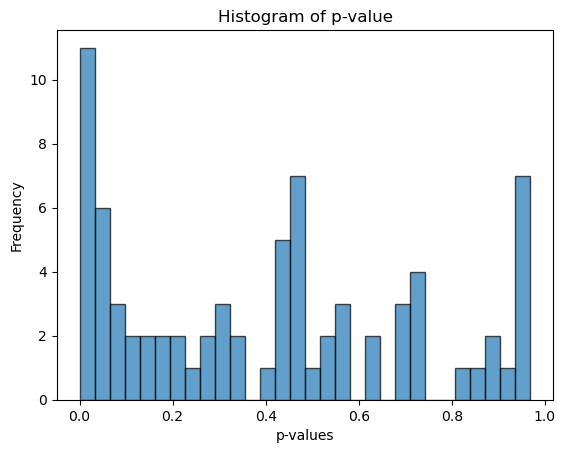

In [79]:
model2 = smf.ols('y~x', data = df).fit()
model2.summary()
pvalues = model2.pvalues
plt.hist(pvalues, bins = 30, edgecolor = 'black', alpha = 0.7)
# set value, x, y labels
plt.title('Histogram of p-value')
plt.xlabel('p-values')
plt.ylabel('Frequency')
plt.show()

In [80]:
from scipy.stats import skew

# Calculate and print the skewness for p-values
skewness_all = skew(pvalues)
print(f"Skewness for all p-values: {skewness_all}")

Skewness for all p-values: 0.3224859414249069


The calculated skewness for  p-values is approximately 0.322, which suggests a slight positive skew in the distribution of the p-values. The concentration of p-values near 1 implies that many of the statistical tests are yielding p-values that suggest a lack of evidence against the null hypothesis.

#### Question 5. False Discovery Rate Control with BH Procedure: Given the p values you find, use the BH procedure to control the FDR with a q of 0.1. How many “true” discoveries do you estimate?

Alpha: 0.0016866310700085175
No. of true discoveries: 7


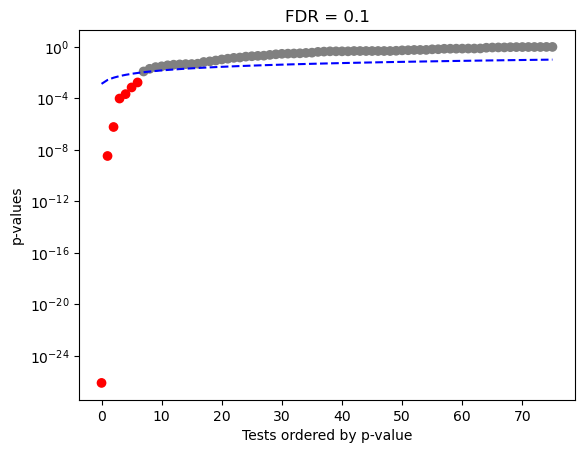

In [76]:
# Define the FDR function
def fdr(pvals, q, plotit=False):
    pvals = np.array(pvalues)
    pvals = pvals[~np.isnan(pvals)]
    N = len(pvals)

    sorted_pvals = np.sort(pvals)
    k = np.arange(1, N+1)
    fdr_threshold = (q * k) / N

    # Find the last p-value that is below the FDR threshold
    below_threshold = sorted_pvals <= fdr_threshold
    max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
    alpha = sorted_pvals[max_index]
    print(f"Alpha: {alpha}")
    
    # Count the number of true discoveries
    num_true_discoveries = np.sum(sorted_pvals <= alpha)
    print("No. of true discoveries:", num_true_discoveries)

    # Optional plot
    if plotit:
        plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
        plt.yscale('log')
        plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
        plt.xlabel("Tests ordered by p-value")
        plt.ylabel("p-values")
        plt.title(f"FDR = {q}")
        plt.show()
    
    return alpha

alpha_threshold = fdr(pvalues, 0.1, plotit=True)


There are 7 "true" discoveries.

#### Question 6. Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables?

Alpha: 0.0006898272201955333
No. of true discoveries: 6


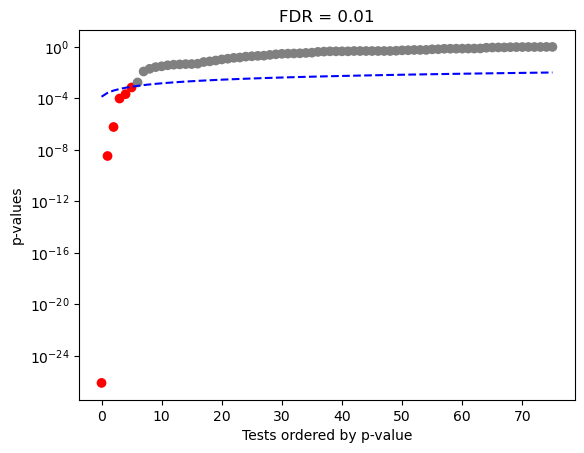

Alpha: 0.0016866310700085175
No. of true discoveries: 7


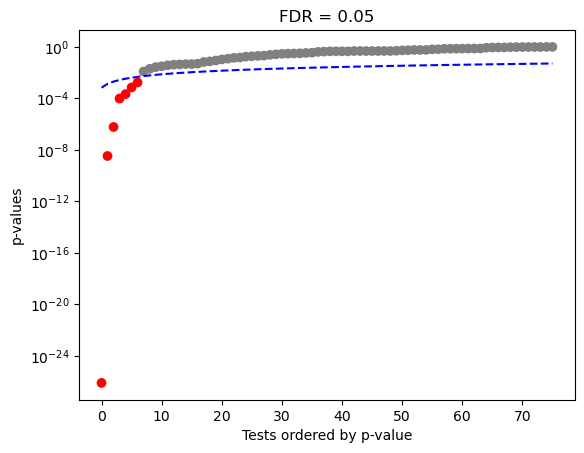

Alpha: 0.0016866310700085175
No. of true discoveries: 7


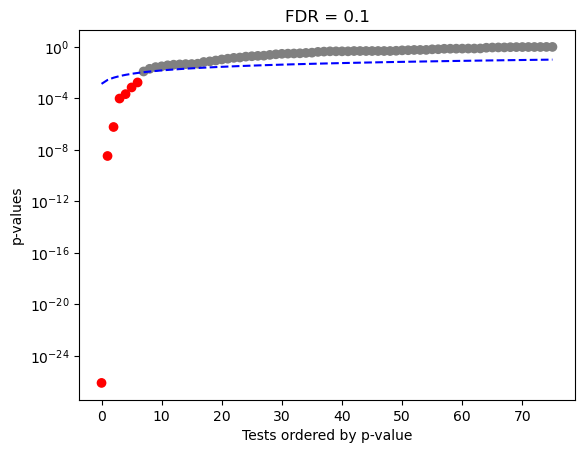

Alpha: 0.01200946602624115
No. of true discoveries: 8


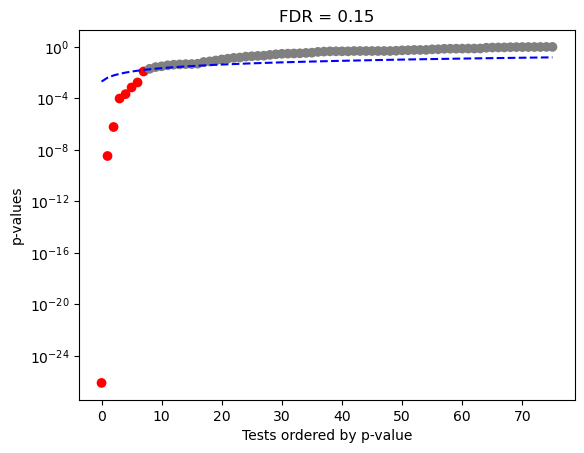

Alpha: 0.02623028013315433
No. of true discoveries: 10


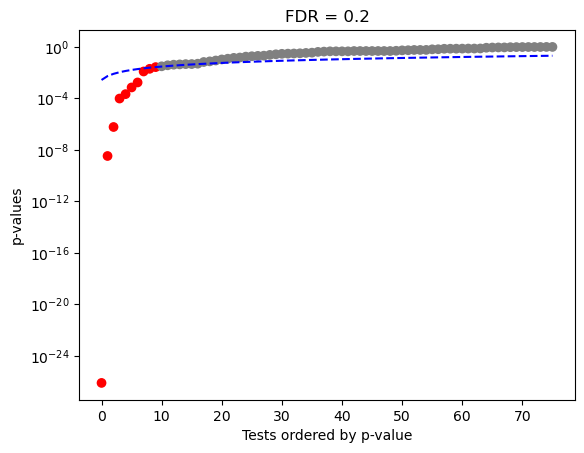

Alpha: 0.07315082666209391
No. of true discoveries: 19


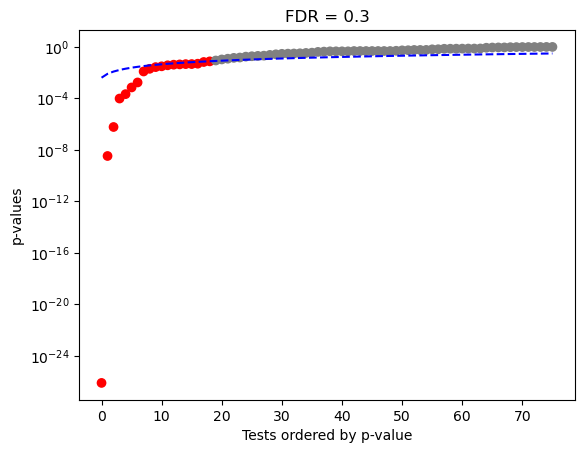

<Figure size 640x480 with 0 Axes>

In [77]:
# Create the plots for diffferent q values
q_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3]

for i, q in enumerate(q_values):
    fdr(pvalues, q, plotit=True)
    
plt.tight_layout()    
plt.show()

We applied the BH procedure at six different q values: 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, and found that as the q value increased from 0.01 to 0.3, the number of "true" discoveries also increased from 6 to 19, because the higher q-value indicates a greater tolerance for falsepositives and less stringency, thereby allowing more p-values to be classified as significant.
The 6 variables that are significant at q = 0.01 are the most robust. They have the strongest evidence against the null hypothesis across the FDR levels we've tested.
The test at q = 0.3 suggests that many of these may be false discoveries or reflect very weak effects. These findings are the least robust and most likely to represent false positives.

#### Question 7. Exploring Interaction Terms: 
#### a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model.


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate interaction terms
X2 = df.iloc[:, :25]
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X2_interaction = poly.fit_transform(X2)

# Build the model 
model3 = LinearRegression().fit(X2_interaction, y)
coefficients = model3.coef_

# Create the dataframe
feature_names = poly.get_feature_names_out(input_features=df.columns[:25])
feature_coefficients = dict(zip(feature_names, coefficients))
coefficients_df = pd.DataFrame(list(feature_coefficients.items()), columns=['Feature', 'Coefficient'])
coefficients_df


,Feature,Coefficient
0,Accounts Payable,-5.096548e-02
1,Accounts Receivable,-6.530705e-02
2,Add'l income/expense items,-1.531177e-01
3,After Tax ROE,-1.393184e-02
4,Capital Expenditures,-1.101201e-02
...,...,...
345,Gross Profit Income Tax,2.240831e-11
346,Gross Profit Intangible Assets,2.583191e-12
347,Income Tax^2,2.972989e-11
348,Income Tax Intangible Assets,-4.919740e-11


#### b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics.

The interaction terms allow the model to capture the combined effects of different variables. For example, the impact of one financial metric on shares outstanding might depend on the level of another metric, and this interdependency can't be understood by considering each variable in isolation. Including interaction terms helps in uncovering these complex relationships, leading to more accurate and insightful predictions about how various financial indicators jointly influence a company's shares outstanding.

#### Question 8. Model Evaluation with Interaction Terms:

#### c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics.


In [34]:
X2_interaction = sm.add_constant(X2_interaction)
model3 = sm.OLS(y, X2_interaction).fit()

model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.58
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  16:26:42   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.365      0.173      -0.000       0.001
x1            -0.0745      0.046     -1.626      0.104      -0.164       0.015
x2            -0.5190      0.286     -1.816      0.070      -1.080       0.042
x3             0.0658      0.272      0.242      0.809      -0.467       0.599
x4            -0.0008      0.001     -1.176      0.240      -0.002       0.001
x5             0.0207      0.097      0.214      0.830      -0.169       0.210
x6             0.0556      0.021      2.657      0.008       0.015       0.097
x7          6.752e-05      0.000      0.390      0.696      -0.000       0.000
x8            -0.0242      0.059     -0.413      0.680      -0.139       0.091
x9            -0.1588      0.486     -0.327      0.744      -1.113       0.796
x10           -0.0121      0.049     -0.246      0.806      -0.109       0.085
x11           -0.0081      0.009     -0.889      0.374      -0.026       0.010
x12           -0.0004      0.000     -1.023      0.307      -0.001       0.000
x13            0.2449      0.121      2.019      0.044       0.007       0.483
x14           -0.0339      0.059     -0.571      0.568      -0.151       0.083
x15            0.0535      0.152      0.353      0.724      -0.244       0.351
x16            0.4079      0.297      1.374      0.170      -0.175       0.991
x17           -0.4624      0.290     -1.594      0.111      -1.032       0.107
x18           -0.0018      0.024     -0.074      0.941      -0.050       0.046
x19           -0.2050      0.127     -1.611      0.107      -0.455       0.045
x20            0.0083      0.020      0.421      0.674      -0.030       0.047
x21            0.0614      0.029      2.142      0.032       0.005       0.118
x22          5.97e-07   2.91e-05      0.021      0.984   -5.65e-05    5.77e-05
x23            0.0269      0.089      0.302      0.763      -0.148       0.202
x24            0.2887      0.300      0.961      0.337      -0.301       0.878
x25           -0.1615      0.045     -3.613      0.000      -0.249      -0.074
x26          4.12e-12   1.92e-12      2.146      0.032    3.52e-13    7.89e-12
x27         5.819e-12   1.72e-11      0.339      0.735   -2.79e-11    3.95e-11
x28         4.625e-11   4.58e-11      1.009      0.313   -4.37e-11    1.36e-10
x29            0.0004      0.000      1.477      0.140      -0.000       0.001
x30         4.246e-11   1.69e-11      2.519      0.012    9.38e-12    7.55e-11
x31         9.583e-13   3.53e-12      0.271      0.786   -5.97e-12    7.89e-12
x32            0.0002      0.000      0.514      0.607      -0.001       0.001
x33        -3.842e-12   6.16e-12     -0.624      0.533   -1.59e-11    8.25e-12
x34         6.517e-13   2.04e-11      0.032      0

In [81]:
r_squared = model3.score(X2_interaction, y)
Adj_r2 = 1 - ( 1- r_squared) * ( len(y) - 1 ) / ( len(y) - X2_interaction.shape[1] - 1 )
print("The R-squared of model 3 is", r_squared, "The adjusted R-squared of model 3 is", Adj_r2)

The R-squared of model 3 is 0.9444621170848039 The adjusted R-squared of model 3 is 0.923957624447337


For the new model with interaction terms, it has adj. R-squared 0.924, which is higher compared to the 0.854 from the original model. and add some content about why

The higher adj. R-squared indicates that the new model with interaction terms is a better fit, which makes sense because when we include the interaction in the model, we're covering more possible parameters, though on the other hand we might be facing overfitting.

#### d. Discuss any significant changes in the model's performance or the coefficients of the predictors.

Comparing the performance of the original and expanded models, the adjusted R-squared value increases from 0.846 to 0.926, this suggests that the expanded model, which presumably includes interaction terms, explains a higher proportion of the variance in the dependent variable, Estimated Shares Outstanding. The AIC and BIC values, which penalize for model complexity, are slightly lower in the expanded model, suggesting an improved model fit when accounting for the number of predictors.

As for the coefficient of the predictors in the expanded model, most are decreased, because when interaction terms are introduced, part of the effect that was previously attributed to the main effect may now be captured by the interaction terms. Another possible reason is that the interaction terms are the products of the original predictors, so this could introduce multicollinearity, and the multicollinearity could lead to smaller coefficient values.

#### Question 9.FDR Analysis with Interaction Terms:
#### a. Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model.

In [47]:
model_9a = smf.ols(formula= 'y ~ X2_interaction', data=df).fit()
pvalues_9a = model_9a.pvalues
model_9a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     52.58
Date:                Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                        20:51:12   Log-Likelihood:                -26886.
No. Observations:                1299   AIC:                         5.440e+04
Df Residuals:                     983   BIC:                         5.604e+04
Df Model:                         315                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0003      0.000      1.365      0.173      -0.000       0.001
X2_interaction[0]      -0.0745      0.046     -1.626      0.104      -0.164       0.015
X2_interaction[1]      -0.5190      0.286     -1.816      0.070      -1.080       0.042
X2_interaction[2]       0.0658      0.272      0.242      0.809      -0.467       0.599
X2_interaction[3]      -0.0008      0.001     -1.176      0.240      -0.002       0.001
X2_interaction[4]       0.0207      0.097      0.214      0.830      -0.169       0.210
X2_interaction[5]       0.0556      0.021      2.657      0.008       0.015       0.097
X2_interaction[6]    6.752e-05      0.000      0.390      0.696      -0.000       0.000
X2_interaction[7]      -0.0242      0.059     -0.413      0.680      -0.139       0.091
X2_interaction[8]      -0.1588      0.486     -0.327      0.744      -1.113       0.796
X2_interaction[9]      -0.0121      0.049     -0.246      0.806      -0.109       0.085
X2_interaction[10]     -0.0081      0.009     -0.889      0.374      -0.026       0.010
X2_interaction[11]     -0.0004      0.000     -1.023      0.307      -0.001       0.000
X2_interaction[12]      0.2449      0.121      2.019      0.044       0.007       0.483
X2_interaction[13]     -0.0339      0.059     -0.571      0.568      -0.151       0.083
X2_interaction[14]      0.0535      0.152      0.353      0.724      -0.244       0.351
X2_interaction[15]      0.4079      0.297      1.374      0.170      -0.175       0.991
X2_interaction[16]     -0.4624      0.290     -1.594      0.111      -1.032       0.107
X2_interaction[17]     -0.0018      0.024     -0.074      0.941      -0.050       0.046
X2_interaction[18]     -0.2050      0.127     -1.611      0.107      -0.455       0.045
X2_interaction[19]      0.0083      0.020      0.421      0.674      -0.030       0.047
X2_interaction[20]      0.0614      0.029      2.142      0.032       0.005       0.118
X2_interaction[21]    5.97e-07   2.91e-05      0.021      0.984   -5.65e-05    5.77e-05
X2_interaction[22]      0.0269      0.089      0.302      0.763      -0.148       0.202
X2_interaction[23]      0.2887      0.300      0.961      0.337      -0.301       0.878
X2_interaction[24]     -0.1615      0.045     -3.613      0.000      -0.249      -0.074
X2_interaction[25]    4.12e-12   1.92e-12      2.146      0.032    3.52e-13    7.89e-12
X2_interaction[26]   5.819e-12   1.72e-11      0.339      0.735   -2.79e-11    3.95e-11
X2_interaction[27]   4.625e-11   4.58e-11      1.009      0.313   -4.37e-11    1.36e-10
X2_interaction[28]      0.0004      0.000      1.477      0.140      -0.000       0.001
X2_interaction[29]   4.246e-11   1.69e-11      2.519      0.012    9.38e-12    7.55e-11
X2_interaction[30]   9.583e-13   3.53e-12      0.271      0.786   -5.97e-12    7.89e-12
X2_

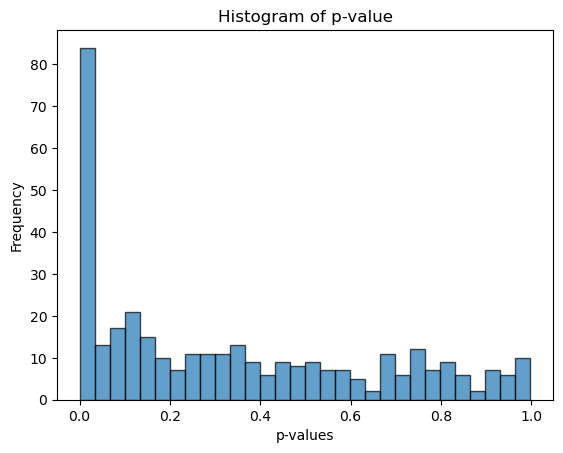

In [46]:
# Create the historgram
plt.hist(pvalues_9a, bins=30, edgecolor = 'black', alpha = 0.7)
plt.title('Histogram of p-value')
plt.xlabel('p-values')
plt.ylabel('Frequency')
plt.show()

This histogram of p-values from the expanded model with interaction terms shows a very different distribution compared to the previous one. The calculated skewness of 2.011 indicates a significant positive skew, meaning there's a strong tail to the right.  This distribution suggests that the expanded model with interaction terms is identifying a larger number of statistically significant relationships (p-values close to 0). The presence of many low p-values indicates that many of the interaction terms are providing explanatory power and are statistically significant. 

#### b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. How many significant predictors are identified now, including both main effects and interaction effects?

Alpha: 0.018690587911188612
No. of true discoveries: 74


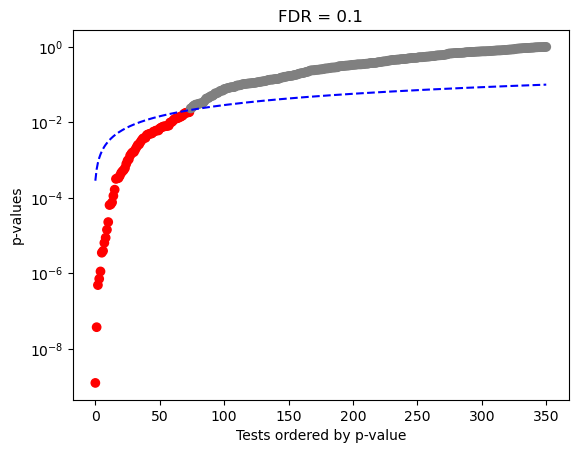

In [78]:
def fdr(pvals, q, plotit=False):
    pvals = np.array(pvals)
    pvals = pvals[~np.isnan(pvals)]
    N = len(pvals)

    sorted_pvals = np.sort(pvals)
    k = np.arange(1, N+1)
    fdr_threshold = (q * k) / N

    # Find the last p-value that is below the FDR threshold
    below_threshold = sorted_pvals <= fdr_threshold
    max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
    alpha = sorted_pvals[max_index]
    print(f"Alpha: {alpha}")
    
    # Count the number of true discoveries
    num_true_discoveries = np.sum(sorted_pvals <= alpha)
    print("No. of true discoveries:", num_true_discoveries)

    # Optional plot
    if plotit:
        plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
        plt.yscale('log')
        plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
        plt.xlabel("Tests ordered by p-value")
        plt.ylabel("p-values")
        plt.title(f"FDR = {q}")
        plt.show()
    
    return alpha


alpha_threshold_newModel = fdr(pvalues_9a, 0.1, plotit=True)

There are 74 identified significant predictors.

#### c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR. 

Including interaction terms in the model increased the significant predictors from 7 to 74, indicating interaction effects are influential and potentially overlooked in the original model. However, adding interactions complicates the model, which could affect interpretability and risk overfitting, but the FDR control keeps false discoveries at 10%. 